In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# 1. Exploratory Data Analysis

In [10]:
pd.set_option('float_format', '{:.3f}'.format)

In [11]:
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#melihat banyaknya fitur pada data set
df.info()

In [12]:
# removing redundant spaces from column names
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [13]:
 print('Check the data. Some values are missing.') if df.isnull().any().any() else print("There are no missing values in the data.")

There are no missing values in the data.


In [14]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [15]:
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [16]:
df['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

# 1.1 Adjusting income column to binary type

In [17]:
income = df.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

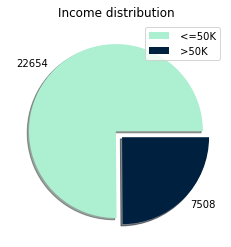

In [18]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [19]:
# changing string to binary values.
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

# 1.2 Creating correlation heatmap

In [20]:
# checking types of variables
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [21]:
# object type variables cannot be included in a correlation heatmap.
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

<AxesSubplot:>

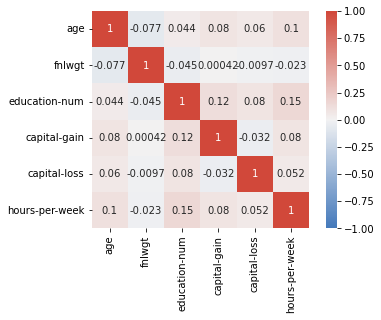

In [23]:
# fig = plt.figure(figsize=(14,14))
corr = stats.corr()
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(h_neg=250, h_pos=15, as_cmap=True),
            square=True, annot=True)

# 1.2 Creating density functions and boxplots

In [24]:
stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30162.000,38.438,13.135,17.000,28.000,37.000,47.000,90.000
fnlwgt,30162.000,189793.834,105652.972,13769.000,117627.250,178425.000,237628.500,1484705.000
education-num,30162.000,10.121,2.550,1.000,9.000,10.000,13.000,16.000
capital-gain,30162.000,1092.008,7406.346,0.000,0.000,0.000,0.000,99999.000
capital-loss,30162.000,88.372,404.298,0.000,0.000,0.000,0.000,4356.000
hours-per-week,30162.000,40.931,11.980,1.000,40.000,40.000,45.000,99.000


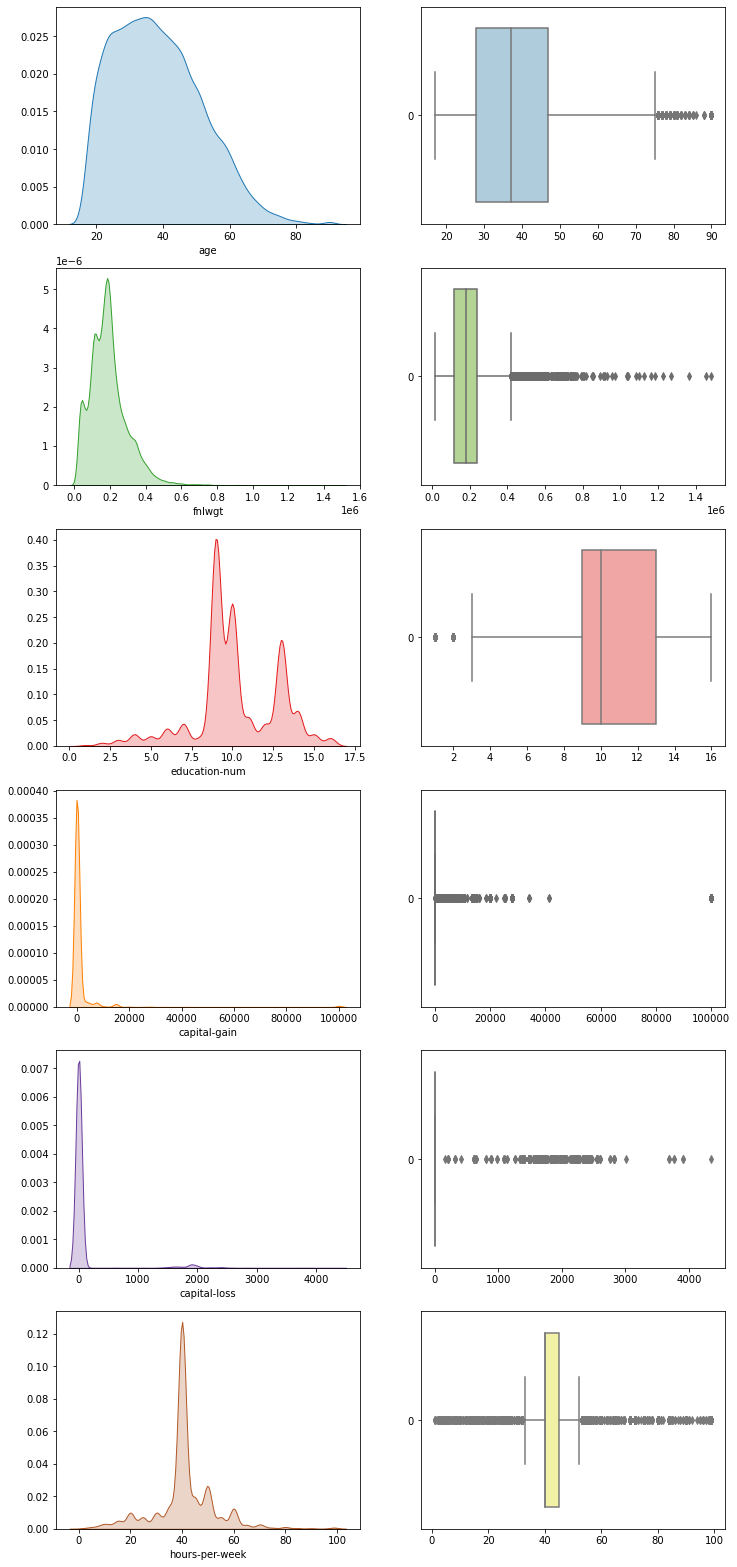

In [25]:
# creating graphs
colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,28))
for i in range(6):
    sns.kdeplot(stats.iloc[:, i], 
                shade = True, 
                color = colors[i*2+1], 
                ax=ax[i, 0]).set(ylabel = '', xlabel = stats.columns[i])
    
    sns.boxplot(data=stats.iloc[:, i],
                color = colors[i*2], orient="h",
                ax=ax[i, 1]).set(xlabel = '', ylabel = '')
plt.show()

# 2. Standardization and preparing variables

In [26]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X = df_final.drop(columns=['income'])
y = df_final['income']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
# creating scaler and new standardized train and test data frames.
scaler = MinMaxScaler()

X_train_numeral = scaler.fit_transform(X_train.select_dtypes(['float', 'int64']))
X_train_s = pd.concat([pd.DataFrame(X_train_numeral, index=X_train.index, columns=X_train.columns[:6]), 
                       X_train.iloc[:, 6:]], axis=1)

X_test_numeral = scaler.transform(X_test.select_dtypes(['float', 'int64']))
X_test_s = pd.concat([pd.DataFrame(X_test_numeral, index=X_test.index, columns=X_test.columns[:6]),
                      X_test.iloc[:, 6:]], axis=1)

In [30]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
26888,47,235986,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13237,53,39643,9,0,0,58,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5619,33,34080,10,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
518,24,82804,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16267,25,137645,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# function responsible for fitting and predicting algorithms given through lists.
def algoritm_score_list(show_processing=False, standardized=False):
    scores_list = []

    for algorithm in algorithms:
        if show_processing:
            print('processing ' + str(algorithm) + ' algorithm...')

        if standardized:
            X_tn = X_train_s
            X_tt = X_test_s
        else:
            X_tn = X_train
            X_tt = X_test
            
        A = algorithm.fit(X_tn, y_train)
        y_predict = A.predict(X_tt)
        accuracy = accuracy_score(y_test,y_predict)

        scores_list.append([A, accuracy, standardized])
        
    print('all predictions finished')
    return scores_list

# 3. Modeling

In [32]:
algorithms = [DecisionTreeClassifier(),
              LogisticRegression(solver='liblinear'), 
              KNeighborsClassifier()]

In [33]:
# default algorithms
default_alg = algoritm_score_list()

all predictions finished


In [34]:
# default algorithms, standardized data
default_alg_s = algoritm_score_list(standardized=True)

all predictions finished


In [35]:
df_alg = pd.DataFrame(default_alg, columns=['algorithm', 'accuracy', 'standardized'])
df_alg = pd.concat([df_alg, 
                    pd.DataFrame(default_alg_s, columns=['algorithm', 'accuracy', 'standardized'])], 
                   axis=0, 
                   ignore_index=True)
df_alg.sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
4,LogisticRegression(solver='liblinear'),0.849,True
5,KNeighborsClassifier(),0.819,True
0,DecisionTreeClassifier(),0.808,False
3,DecisionTreeClassifier(),0.807,True
1,LogisticRegression(solver='liblinear'),0.789,False
2,KNeighborsClassifier(),0.765,False


# 3.1 Tuning DecisionTree

# 3.1.1 max_depth

In [36]:
# max_depth in already created DT
depth = default_alg[0][0].get_depth()

algorithms = []
for i in range(1, depth+1):
    algorithms.append(DecisionTreeClassifier(max_depth=i))
score_list = algoritm_score_list()

all predictions finished


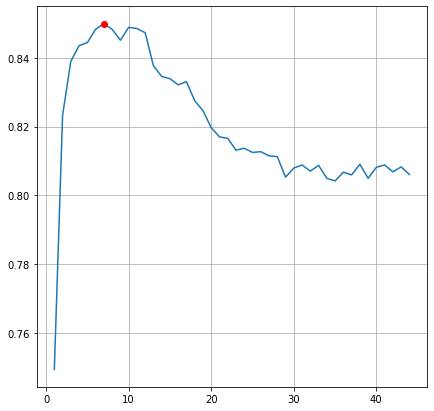

In [37]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, depth+1), y=scores)
plt.plot(scores.index(max(scores)) + 1, max(scores), "or")

In [38]:
print('The best algorithm: DecisionTreeClassifier(max_depth={}), its accuracy: {}'.format(scores.index(max(scores)) + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=7), its accuracy: 0.85


# 3.1.2 min_samples_leaf

In [39]:
# min_samples_leaf in already created DT
default_alg[0][0].get_params()['min_samples_leaf']

1

In [40]:
algorithms = []
for i in range(1, 202, 5):
    algorithms.append(DecisionTreeClassifier(min_samples_leaf=i))
score_list = algoritm_score_list()

all predictions finished


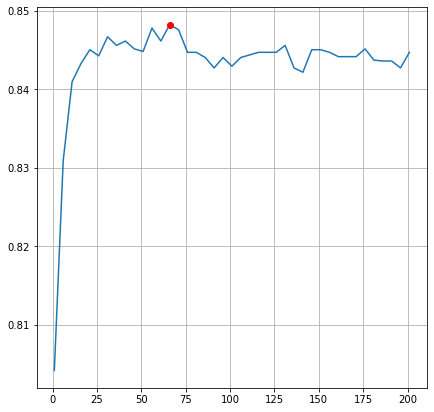

In [41]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, 202, 5), y=scores)
plt.plot(scores.index(max(scores))*5 + 1, max(scores), "or")

In [42]:
print('The best algorithm: DecisionTreeClassifier(min_samples_leaf={}), its accuracy: {}'.format(scores.index(max(scores))*5 + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(min_samples_leaf=66), its accuracy: 0.848


# 3.1.3 max_depth and min_samples_leaf

In [43]:
algorithms = []
for i in range(4, 30, 3):
    for j in range(45, 86, 5):
         algorithms.append(DecisionTreeClassifier(max_depth=i, min_samples_leaf=j))
score_list = algoritm_score_list()

all predictions finished


In [44]:
max_depth = list(map(lambda a: a[0].get_params()['max_depth'], score_list))
min_samples_leaf = list(map(lambda a: a[0].get_params()['min_samples_leaf'], score_list))
scores = list(map(lambda a: a[1], score_list))

df = pd.DataFrame(np.array([max_depth, min_samples_leaf, scores]).T, 
                  columns=['max_depth', 'min_s_l', 'scores'])

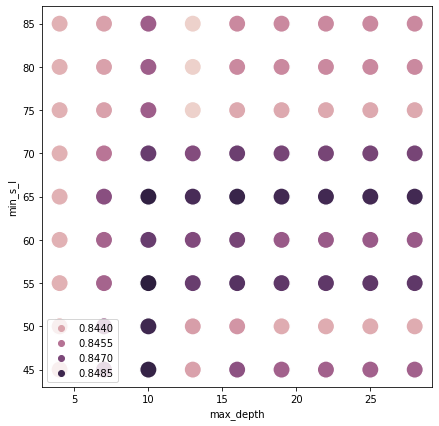

In [45]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=df['max_depth'], y=df['min_s_l'], hue=df['scores'], s=300)
plt.legend(loc='lower left')

In [46]:
best = scores.index(max(scores))
m_d = max_depth[best]
m_s_l = min_samples_leaf[best]
print('The best algorithm: DecisionTreeClassifier(max_depth={}, min_samples_leaf={}), its accuracy: {}'.format(m_d, m_s_l, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=10, min_samples_leaf=55), its accuracy: 0.849


# 3.1.4 criterion

In [47]:
algorithms = [DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy')]
score_list = algoritm_score_list()   
print('criterion: gini, score: {}.'.format(str(round(score_list[0][1], 3))))
print('criterion: entropy, score: {}.'.format(str(round(score_list[1][1], 3))))

all predictions finished
criterion: gini, score: 0.807.
criterion: entropy, score: 0.808.


# 3.1.5 Algorithms comparison

In [48]:
algorithms = [DecisionTreeClassifier(criterion='gini', max_depth=9), 
              DecisionTreeClassifier(criterion='gini', min_samples_leaf=66), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65)]
df_DT = pd.DataFrame(algoritm_score_list(), columns=['algorithm', 'accuracy', 'standardized'])
df_DT

all predictions finished


,algorithm,accuracy,standardized
0,DecisionTreeClassifier(max_depth=9),0.846,False
1,DecisionTreeClassifier(min_samples_leaf=66),0.848,False
2,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.849,False


# 3.2 Tuning LogisticRegression

In [49]:
algorithms = []
for p in ['l1', 'l2']:
    algorithms.append(LogisticRegression(solver='liblinear', penalty=p))
    
df_LR_penalty = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])
df_LR_penalty

all predictions finished


,algorithm,accuracy,standardized
0,"LogisticRegression(penalty='l1', solver='libli...",0.850,True
1,LogisticRegression(solver='liblinear'),0.849,True


In [50]:
algorithms = []
for c in [100, 10, 1.0, 0.1, 0.01]:
    algorithms.append(LogisticRegression(solver='liblinear', penalty='l1', C=c))

df_LR = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])
df_LR

all predictions finished


,algorithm,accuracy,standardized
0,"LogisticRegression(C=100, penalty='l1', solver...",0.850,True
1,"LogisticRegression(C=10, penalty='l1', solver=...",0.849,True
2,"LogisticRegression(penalty='l1', solver='libli...",0.850,True
3,"LogisticRegression(C=0.1, penalty='l1', solver...",0.849,True
4,"LogisticRegression(C=0.01, penalty='l1', solve...",0.819,True


# 3.3 Tuning KNeighborsClassifier

In [51]:
algorithms = [KNeighborsClassifier(weights='uniform'), 
              KNeighborsClassifier(weights='distance')]
df_KN_weights = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])
df_KN_weights

all predictions finished


,algorithm,accuracy,standardized
0,KNeighborsClassifier(),0.819,True
1,KNeighborsClassifier(weights='distance'),0.813,True


In [52]:
algorithms = []
for i in range(1, 50, 5):
    algorithms.append(KNeighborsClassifier(n_neighbors=i))
    
df_KN_n_neighbors = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])

all predictions finished


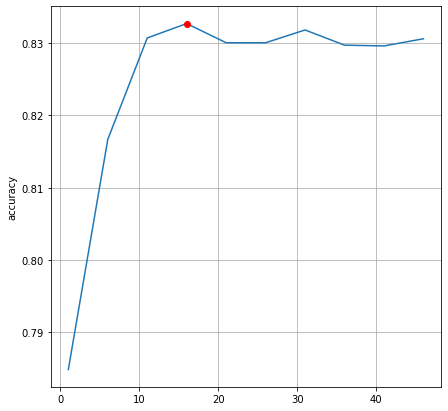

In [53]:
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, 50, 5), y=df_KN_n_neighbors['accuracy'])
plt.plot(df_KN_n_neighbors[df_KN_n_neighbors['accuracy'] == max(df_KN_n_neighbors['accuracy'])].index.values[0]*5+1,
         max(df_KN_n_neighbors['accuracy']),
         "or")

# 4 Final comparison and summary

In [54]:
algorithms = [DecisionTreeClassifier(), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65),
              LogisticRegression(solver='liblinear'), 
              LogisticRegression(C=10, penalty='l1', solver='liblinear'),
              KNeighborsClassifier(), 
              KNeighborsClassifier(n_neighbors=46)]

final_list = algoritm_score_list()

all predictions finished


In [55]:
algorithms = [DecisionTreeClassifier(), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65),
              LogisticRegression(solver='liblinear'), 
              LogisticRegression(C=10, penalty='l1', solver='liblinear'),
              KNeighborsClassifier(), 
              KNeighborsClassifier(n_neighbors=46)]
final_list = final_list + algoritm_score_list(standardized=True)

all predictions finished


In [56]:
final_df = pd.DataFrame(final_list, columns=['algorithm', 'accuracy', 'standardized'])
final_df.head(12).sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
3,"LogisticRegression(C=10, penalty='l1', solver=...",0.850,False
9,"LogisticRegression(C=10, penalty='l1', solver=...",0.849,True
8,LogisticRegression(solver='liblinear'),0.849,True
1,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.849,False
7,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.849,True
11,KNeighborsClassifier(n_neighbors=46),0.831,True
10,KNeighborsClassifier(),0.819,True
0,DecisionTreeClassifier(),0.809,False
6,DecisionTreeClassifier(),0.805,True
2,LogisticRegression(solver='liblinear'),0.789,False
